# Question 5

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def analyze_image(img, title):
    M, N = img.shape
    total_pixels = M * N
    
    hist = [0] * 256   # array of 256 values initialized to 0
    
    for i in range(M):
        for j in range(N):
            intensity = img[i, j]
            hist[intensity] += 1
            
    for i in range(256):
        hist[i] = hist[i]/total_pixels
        
    
    mean = np.mean(img)
    variance = np.var(img)
    
    rmin = np.min(img)
    rmax = np.max(img)
    data_range = rmax - rmin
    
    if mean < 85:
        brightness = "Dark"
    elif mean > 170:
        brightness = "Bright"
    else:
        brightness = "Moderate brightness"

    if variance < 500:
        contrast = "Low contrast"
    else:
        contrast = "High contrast"
        
    print(f"Image type : {title}")
    print(f"\nMean - {mean}; var - {variance}; intensity min - {rmin}; intensity max - {rmax}; intensity range - {data_range}")
    print(f"\nImage is : {brightness, contrast}")
    plt.figure(figsize=(5,5))
    plt.plot(hist)
    plt.xlabel("Intensity values")
    plt.ylabel("Probability")
    plt.title(f"Normalized histogram of {title}")
    
    return hist, mean, variance, data_range


Image type : Backlit Image

Mean - 59.85291290283203; var - 3234.0531563404365; intensity min - 0; intensity max - 255; intensity range - 255

Image is : ('Dark', 'High contrast')
Image type : Portrait Image

Mean - 74.28971481323242; var - 2386.6499177134683; intensity min - 0; intensity max - 255; intensity range - 255

Image is : ('Dark', 'High contrast')
Image type : Dark Image

Mean - 5.680156707763672; var - 166.31588645615557; intensity min - 0; intensity max - 148; intensity range - 148

Image is : ('Dark', 'Low contrast')


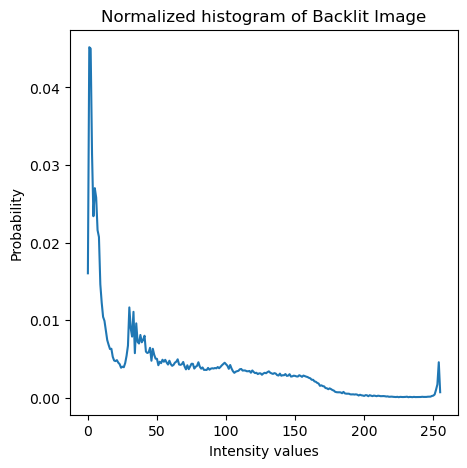

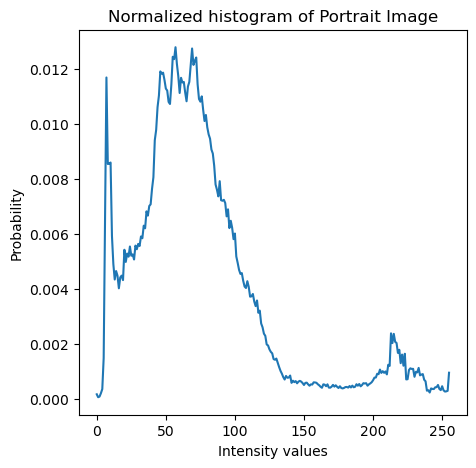

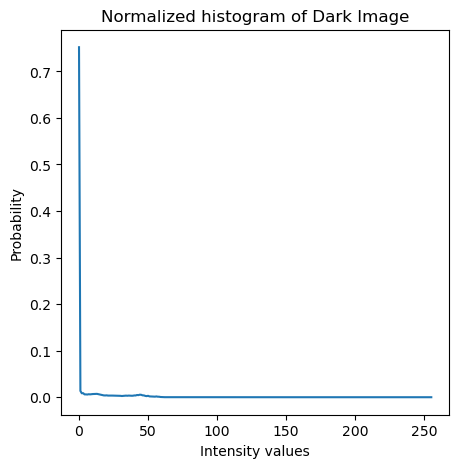

In [44]:
img1 = cv2.imread("Image1_gray.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("Image2_gray.jpg", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("Image3_gray.jpg", cv2.IMREAD_GRAYSCALE)

hist1, mean1, var1, range1 = analyze_image(img1, "Backlit Image")
hist2, mean2, var2, range2 = analyze_image(img2, "Portrait Image")
hist3, mean3, var3, range3 = analyze_image(img3, "Dark Image")


In [49]:
def hist_equalization(img, hist, title, L=256):

    # CDF and transformation
    cdf = np.cumsum(hist)
    s_k = np.round((L - 1) * cdf).astype(np.uint8)

    # Apply transformation
    img_eq = s_k[img]
    
    # new histogram
    M, N = img.shape
    
    hist_new = [0] * 256   # array of 256 values initialized to 0
    
    for i in range(M):
        for j in range(N):
            intensity = img_eq[i, j]
            hist_new[intensity] += 1
            
    for i in range(256):
        hist_new[i] = hist_new[i]/(M*N)
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{title} - Original")
    plt.axis('off')
    
    plt.subplot(2,2,2)
    plt.plot(hist, color='black')
    plt.title("Original Histogram")
    
    plt.subplot(2,2,3)
    plt.imshow(img_eq, cmap='gray')
    plt.title("Equalized Image")
    plt.axis('off')
    
    plt.subplot(2,2,4)
    plt.plot(hist_new, color='black')
    plt.title("Equalized Histogram")

    plt.show()
    
    # Transformation function
    plt.figure(figsize=(5,3))
    plt.plot(s_k)
    plt.title("Transformation Function $s_k$ vs $r_k$")
    plt.xlabel("$r_k$")
    plt.ylabel("$s_k$")
    plt.grid(True)
    plt.show()
    
    return img_eq


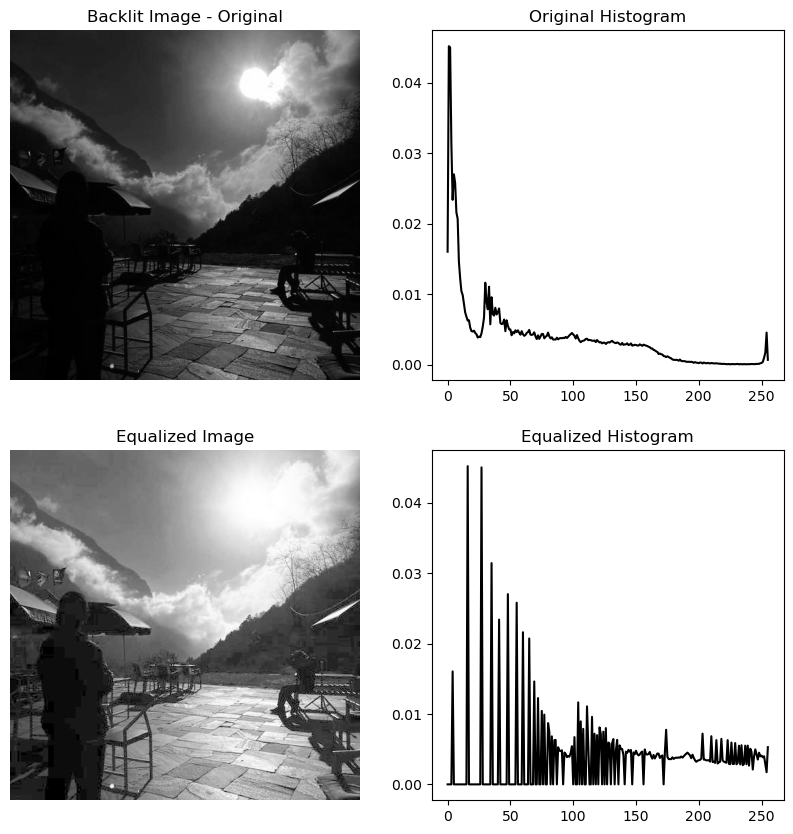

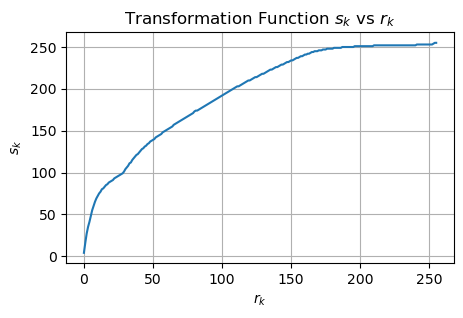

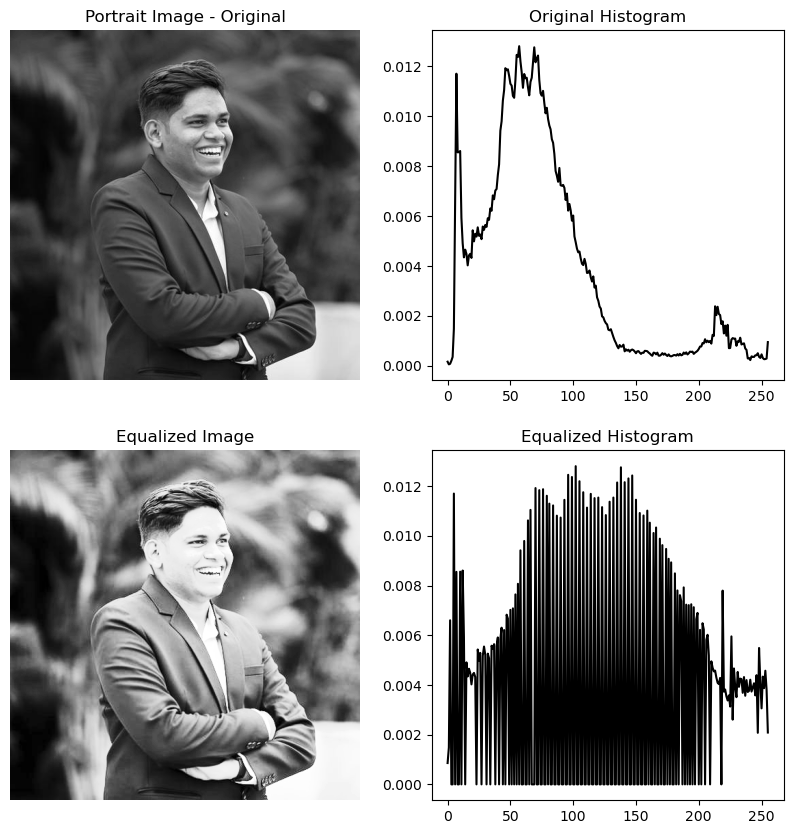

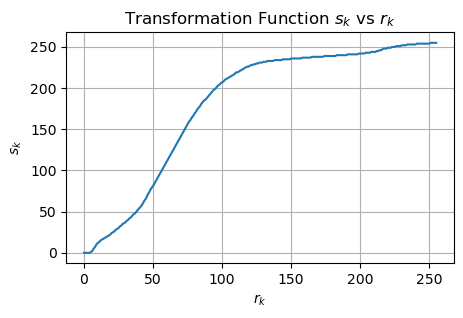

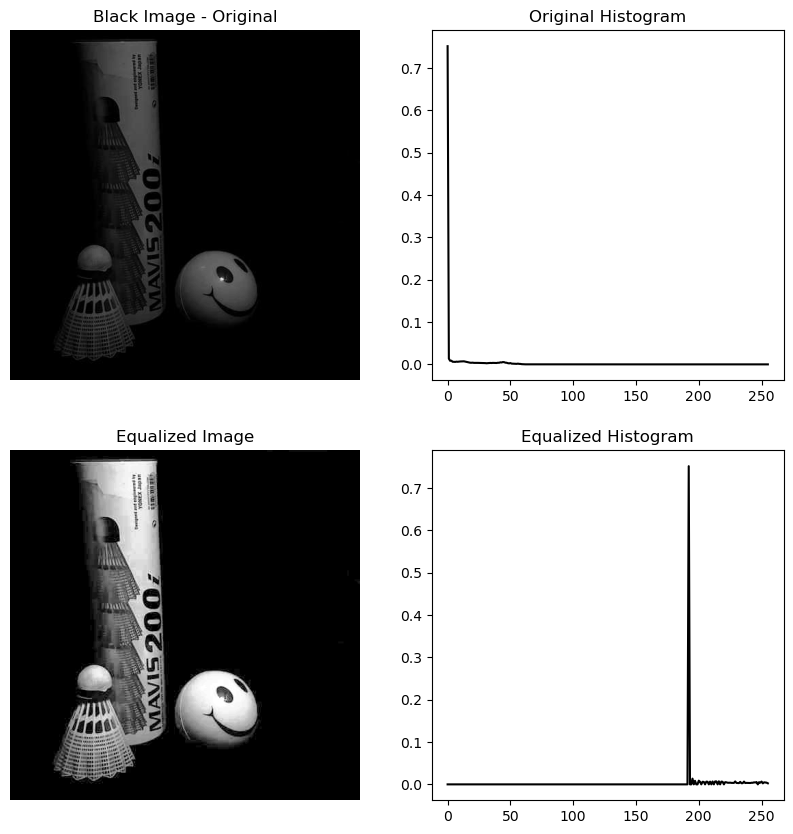

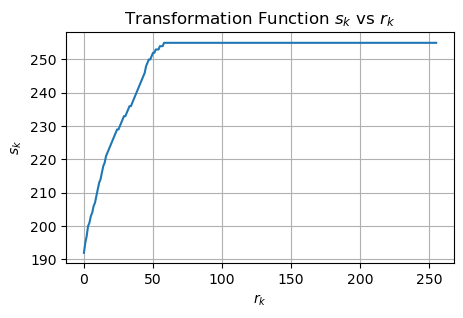

In [51]:
img1_new = hist_equalization(img1, hist1, "Backlit Image")
img2_new = hist_equalization(img2, hist2, "Portrait Image")
img3_new = hist_equalization(img3, hist3, "Black Image")